<h1 style="color:blue; text-align:center;""> Lecture 35-Extension </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

## CNN on CIFAR-10 Dataset

### Imports

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import warnings
from matplotlib import pyplot


%matplotlib inline
warnings.filterwarnings('ignore')

### Data

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])

# show the plot
pyplot.show()

In [9]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
# num_classes 
num_classes = y_test.shape[1]
num_classes

### Model Defining

##### Model Architecture

In [5]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 7
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

### Model Training and Validation

In [6]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32).history
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 188s 4ms/step - loss: 1.7150 - accuracy: 0.3820 - val_loss: 1.4300 - val_accuracy: 0.4876
Epoch 2/7
50000/50000 [==============================] - 195s 4ms/step - loss: 1.3698 - accuracy: 0.5071 - val_loss: 1.2430 - val_accuracy: 0.5588
Epoch 3/7
50000/50000 [==============================] - 180s 4ms/step - loss: 1.2475 - accuracy: 0.5527 - val_loss: 1.1672 - val_accuracy: 0.5850
Epoch 4/7
50000/50000 [==============================] - 185s 4ms/step - loss: 1.1656 - accuracy: 0.5853 - val_loss: 1.1332 - val_accuracy: 0.5979
Epoch 5/7
50000/50000 [==============================] - 180s 4ms/step - loss: 1.1128 - accuracy: 0.6021 - val_loss: 1.0972 - val_accuracy: 0.6079
Epoch 6/7
50000/50000 [==============================] - 180s 4ms/step - loss: 1.0626 - accuracy: 0.6222 - val_loss: 1.0769 - val_accuracy: 0.6179
Epoch 7/7
50000/50000 [==============================] - 182s 4ms/st

In [7]:
history

{'val_loss': [1.4299882116317748,
  1.2429788101196289,
  1.1672407302856445,
  1.1331502752304077,
  1.097159181022644,
  1.076885693359375,
  1.0474782161712646],
 'val_accuracy': [0.4875999987125397,
  0.5587999820709229,
  0.5849999785423279,
  0.5978999733924866,
  0.6079000234603882,
  0.617900013923645,
  0.628000020980835],
 'loss': [1.7150364415740966,
  1.3698236926651002,
  1.2474650449371338,
  1.1655897412109375,
  1.1128189582061767,
  1.0625829444885253,
  1.0254879929542542],
 'accuracy': [0.38198, 0.50712, 0.55272, 0.58534, 0.60214, 0.62224, 0.63904]}

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025ED1EACE48>,
       dtype=object))

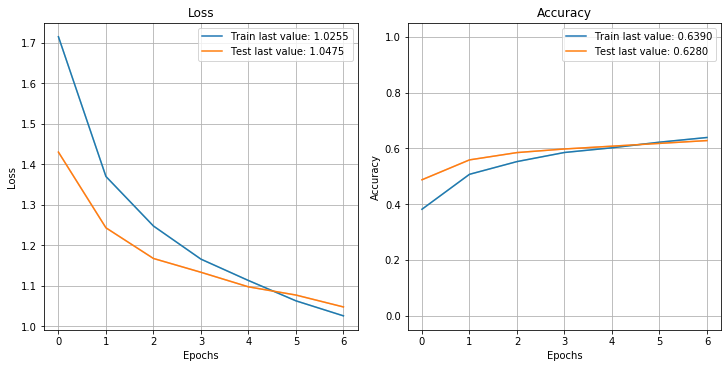

In [8]:
from plot_keras_history import plot_history
plot_history(history)